In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [17]:
df=pd.read_csv('BRCA Data.csv')

In [18]:
df.head(3)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive


In [19]:
df.isnull().sum().sum()

142

In [20]:
df.duplicated().sum()

6

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum().sum()

0

In [26]:
df.shape

(317, 16)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [30]:
df['Gender'].value_counts() #Highly Imbalanced

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64

In [32]:
patient_status=df['Patient_Status'].value_counts()

In [33]:
patient_status

Patient_Status
Alive    255
Dead      62
Name: count, dtype: int64

In [36]:
#Visualization
names=patient_status.index
values=patient_status.values

In [54]:
figure=px.pie(df,names,values,hole=0.6,title="Patient Status")
figure.show()

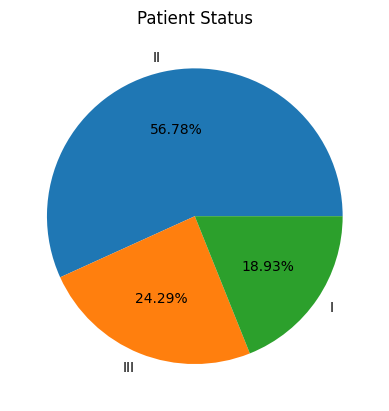

In [71]:
plt.pie(x=values,labels=names,autopct="%1.2f%%")
plt.title("Patient Status")
plt.show()

In [56]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [60]:
Tumour_Stage=df['Tumour_Stage'].value_counts()

In [61]:
Tumour_Stage

Tumour_Stage
II     180
III     77
I       60
Name: count, dtype: int64

In [62]:
names=Tumour_Stage.index
values=Tumour_Stage.values

In [79]:
figure=px.pie(df,names,values,hole=0.6,title="Tumour Stage Of Patients")
figure.show()

Text(0.5, 1.0, 'Tumour Stage of Patients')

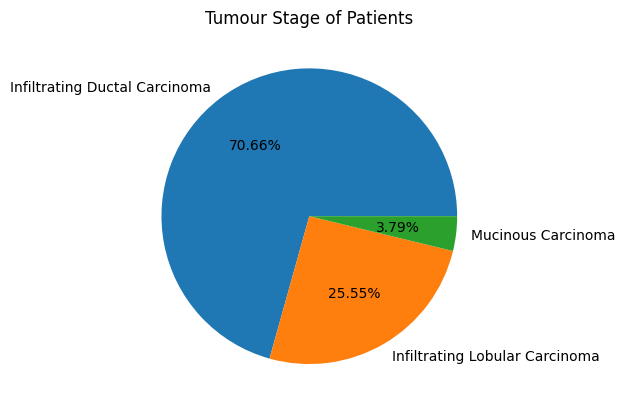

In [81]:
plt.pie(x=values,labels=names,autopct="%1.2f%%")
plt.title("Tumour Stage of Patients")

In [74]:
histology=df['Histology'].value_counts()

In [75]:
names=histology.index
values=histology.values

In [78]:
figure=px.pie(names,values,hole=0.6,title="Histology Of Patients")
figure.show()

In [82]:
ER_status = df['ER status'].value_counts()
names = ER_status.index
values= ER_status.values

In [84]:
figure = px.pie(df,names,values,hole = 0.5,title="ER Status")
figure.show()

In [87]:
PR_status = df['PR status'].value_counts()
names =PR_status.index
values=PR_status.values

In [88]:
figure = px.pie(df,names,values,hole = 0.5,title="PR Status")
figure.show()

In [89]:
HER2_status = df['HER2 status'].value_counts()
names = HER2_status.index
values= HER2_status.values

In [90]:
figure = px.pie(df,names,values,hole = 0.5,title="HER2 Status")
figure.show()

In [91]:
df.drop(['Patient_ID','ER status','PR status','Date_of_Surgery','Date_of_Last_Visit'],axis=1,inplace=True)

In [93]:
df.shape

(317, 11)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             317 non-null    float64
 1   Gender          317 non-null    object 
 2   Protein1        317 non-null    float64
 3   Protein2        317 non-null    float64
 4   Protein3        317 non-null    float64
 5   Protein4        317 non-null    float64
 6   Tumour_Stage    317 non-null    object 
 7   Histology       317 non-null    object 
 8   HER2 status     317 non-null    object 
 9   Surgery_type    317 non-null    object 
 10  Patient_Status  317 non-null    object 
dtypes: float64(5), object(6)
memory usage: 29.7+ KB


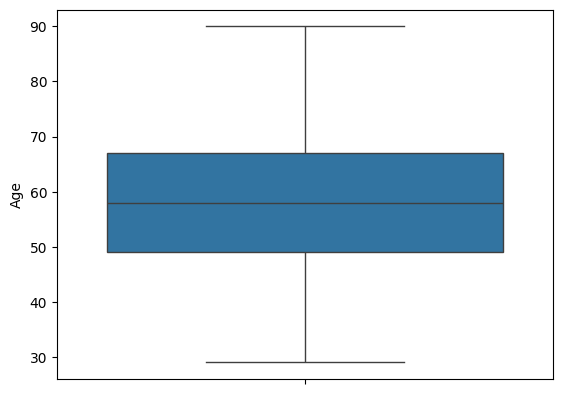

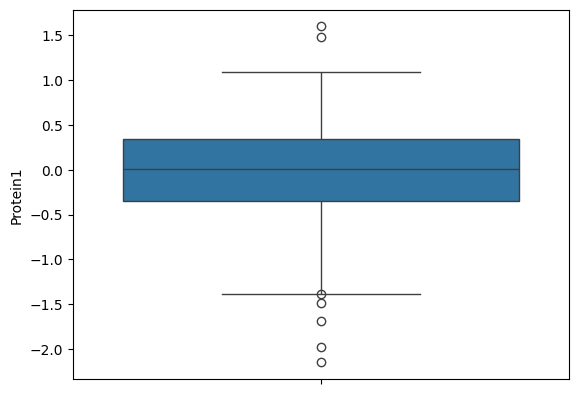

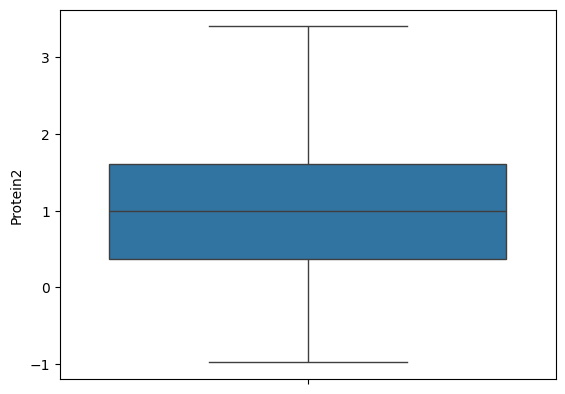

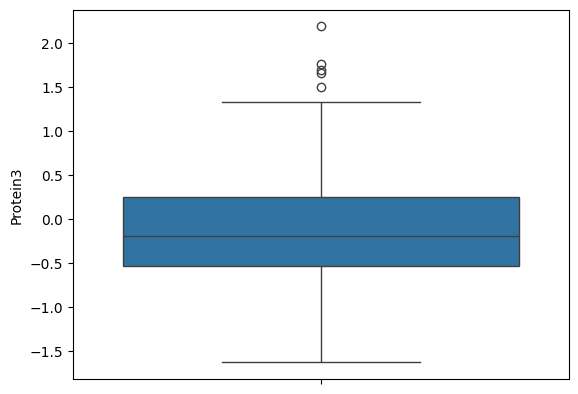

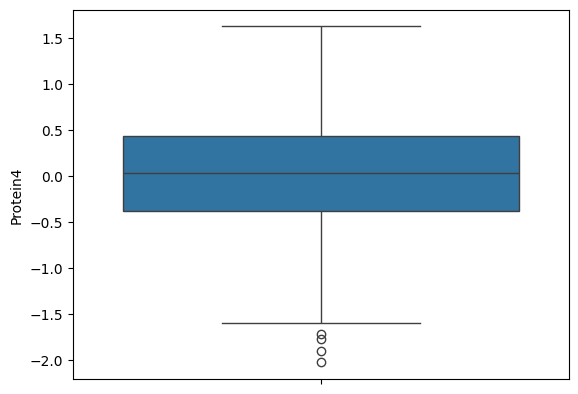

In [104]:
list=['Age','Protein1','Protein2','Protein3','Protein4']
for i in list:
  plt.figsize=(10,5)
  sns.boxplot(y=df[i])
  plt.show()

In [111]:
import ydata_profiling
from ydata_profiling import ProfileReport

In [112]:
ProfileReport(df,title="EDA Report of Breast Cancer Prediction")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [115]:
from pycaret.classification import *

In [125]:
cancer=setup(data=df,target='Patient_Status',transformation=True,remove_multicollinearity = True,fold=5,train_size=0.7)

,Description,Value
0,Session id,2116
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(317, 11)"
5,Transformed data shape,"(317, 18)"
6,Transformed train set shape,"(221, 18)"
7,Transformed test set shape,"(96, 18)"
8,Numeric features,5
9,Categorical features,5


In [126]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.0000,0.8000,0.6400,0.7111,0.0000,0.0000
1,0.7955,0.0000,0.7955,0.6660,0.7250,-0.0421,-0.0719
2,0.7955,0.0000,0.7955,0.6660,0.7250,-0.0421,-0.0719
3,0.7727,0.0000,0.7727,0.6290,0.6935,-0.0427,-0.0773
4,0.7955,0.0000,0.7955,0.6327,0.7048,0.0000,0.0000
Mean,0.7918,0.0000,0.7918,0.6467,0.7119,-0.0254,-0.0442
Std,0.0097,0.0000,0.0097,0.0161,0.0121,0.0207,0.0362


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [130]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [127]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8055,0.4765,0.8055,0.6489,0.7187,0.0000,0.0000,0.3040
ridge,Ridge Classifier,0.8055,0.4709,0.8055,0.6489,0.7187,0.0000,0.0000,0.1800
dummy,Dummy Classifier,0.8055,0.0000,0.8055,0.6489,0.7187,0.0000,0.0000,0.4300
svm,SVM - Linear Kernel,0.8009,0.4508,0.8009,0.6692,0.7270,0.0327,0.0347,0.1800
lda,Linear Discriminant Analysis,0.7919,0.4633,0.7919,0.6466,0.7119,-0.0244,-0.0372,0.1820
rf,Random Forest Classifier,0.7918,0.0000,0.7918,0.6467,0.7119,-0.0254,-0.0442,0.3400
knn,K Neighbors Classifier,0.7782,0.0000,0.7782,0.6669,0.7116,-0.0213,-0.0207,0.1860
et,Extra Trees Classifier,0.7694,0.0000,0.7694,0.6858,0.7078,-0.0335,-0.0192,0.3080
xgboost,Extreme Gradient Boosting,0.7647,0.0000,0.7647,0.7086,0.7300,0.0607,0.0636,0.2220
gbc,Gradient Boosting Classifier,0.7645,0.5457,0.7645,0.7070,0.7264,0.0493,0.0567,0.4080


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2116, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.3549,0.8000,0.6400,0.7111,0.0000,0.0000
1,0.8182,0.5174,0.8182,0.6694,0.7364,0.0000,0.0000
2,0.8182,0.4792,0.8182,0.6694,0.7364,0.0000,0.0000
3,0.7955,0.5302,0.7955,0.6327,0.7048,0.0000,0.0000
4,0.7955,0.4730,0.7955,0.6327,0.7048,0.0000,0.0000
Mean,0.8055,0.4709,0.8055,0.6489,0.7187,0.0000,0.0000
Std,0.0105,0.0620,0.0105,0.0170,0.0146,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [129]:
evaluate_model(ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [131]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [133]:
get_config('X_test')

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
14,53.0,FEMALE,0.560420,0.82251,-0.534760,0.26527,II,Mucinous Carcinoma,Negative,Modified Radical Mastectomy
234,64.0,FEMALE,0.416030,1.60940,-0.519440,0.94267,III,Infiltrating Ductal Carcinoma,Negative,Lumpectomy
178,48.0,FEMALE,-0.643980,-0.59363,-0.109740,-1.60280,III,Infiltrating Ductal Carcinoma,Negative,Other
243,59.0,FEMALE,0.024598,1.40050,0.024751,0.28032,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy
173,54.0,FEMALE,-0.417060,1.26940,-0.726810,-0.82771,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
...,...,...,...,...,...,...,...,...,...,...
168,70.0,FEMALE,0.700290,0.97347,-0.296450,0.10551,I,Infiltrating Ductal Carcinoma,Negative,Simple Mastectomy
320,59.0,FEMALE,0.452300,1.39590,-0.230840,0.79631,I,Infiltrating Lobular Carcinoma,Negative,Other
325,78.0,FEMALE,-0.917230,-0.64693,0.552590,0.45874,II,Infiltrating Lobular Carcinoma,Negative,Modified Radical Mastectomy
52,55.0,FEMALE,-0.663420,1.93820,-0.775370,-0.26366,II,Infiltrating Lobular Carcinoma,Negative,Modified Radical Mastectomy
